In [5]:
import sys, math
sys.path
sys.path.insert(0, 'path/C:/Users/gulsh/Desktop/CS 535 Deep Learning/Practice/nn_logistic')
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
np.random.seed(2)
%matplotlib inline


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'path\\C:\\Users\\gulsh\\Desktop\\CS 535 Deep Learning\\Practice\\nn_logistic'

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

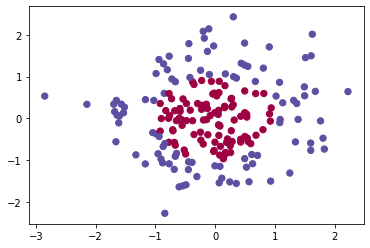

In [68]:
gaussian_quantiles=load_extra_datasets()
#gaussian_quantiles
x,y=gaussian_quantiles
x,y=x.T,y.reshape(1,y.shape[0])
plt.scatter(x[0, :], x[1, :], c= y[0],s=40, cmap=plt.cm.Spectral);

In [72]:
shape_x=x.shape
shape_y=y.shape

print("Shape of input vector is "+ str(shape_x))
print("Shape of output vector is "+ str(shape_y))

Shape of input vector is (2, 200)
Shape of output vector is (1, 200)


In [126]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [74]:
clf=sklearn.linear_model.LogisticRegressionCV();
clf.fit(x.T,y.T)

C:\Users\gulsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gulsh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [76]:
LR_predictions = clf.predict(x.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 53 % (percentage of correctly labelled datapoints)


In [79]:
x.shape[1]

200

In [80]:
def init_layer_sizes(x,y):
    n_x=x.shape[0]
    n_h=4
    n_y=y.shape[0]
    return (n_x,n_h,n_y)

In [100]:
def init_params(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros(shape=(n_h,1))
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros(shape=(n_y,1))
    #print(b1)
    params={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return params

In [94]:
init_params(2,4,1)
y.shape[1]

200

In [92]:
def feed_fwd(x,params):
    W1=params['w1']
    B1=params['b1']
    W2=params['w2']
    B2=params['b2']
    
    
    z1=np.dot(W1,x)+B1
    a1=np.tanh(z1)
    z2=np.dot(W2,a1)+B2
    a2=sigmoid(z2)
    
    cache={'z1':z1,'a1':a1,'z2':z2,'a2':a2}
    return a2, cache

In [103]:
def compute_cost(a2,y,params):
    m=y.shape[1]
    
    log_likelihood= np.multiply(y,np.log(a2))+np.multiply(1-y,np.log(1-a2))
    cost_computed= -np.sum(log_likelihood)/m
    
    #shrinking the array to an integer
    cost=np.squeeze(cost_computed)
    
    return cost

In [101]:
def back_propogation(params,cache,x,y):
    
    m=x.shape[1]
    w1=params['w1']
    w2=params['w2']
    a1=cache['a1']
    a2=cache['a2']
    
    #calculating update to be done in each parameter
    dz2=a2-y
    dw2=(1/m) * np.dot(dz2,a1.T)
    db2=(1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(w2.T, dz2), 1 - np.power(a1, 2))
    dw1 = (1 / m) * np.dot(dz1, x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    
    grads={'dw1':dw1,'db1':db1,'dw2':dw2,'db2':db2}
    
    return grads
    

In [102]:
def update_params(params,grads, learning_rate=1.2):
    w1=params['w1']
    b1=params['b1']
    w2=params['w2']
    b2=params['b2']
    
    dw1=grads['dw1']
    dw2=grads['dw2']
    db1=grads['db1']
    db2=grads['db2']
    
    #updating parameters
    w1=w1- learning_rate*dw1
    b1=b1 - learning_rate*db1
    w2= w2 - learning_rate*dw2
    b2= b2 - learning_rate*db2
    
    params= {'w1':w1, 'b1':b1,'w2':w2,'b2':b2}
    return params
    

In [104]:
def nn(x,y,n_h,iterations=10000,print_cost=False):
    
    np.random.seed(3)
    n_x=init_layer_sizes(x,y)[0]
    n_y=init_layer_sizes(x,y)[2]
    
    parameters=init_params(n_x,n_h,n_y)
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    for i in range(0,iterations):
        a2,cache= feed_fwd(x,parameters)
        
        cost= compute_cost(a2,y,parameters)
        
        grads= back_propogation(parameters,cache,x,y)
        
        parameters=update_params(parameters,grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [105]:
def predict(params,x):
    a2,cache=feed_fwd(x,params)
    predictions=a2>0.5
    
    return predictions

In [117]:
"""
Prediction accuracy using 5 neurons in hidden layer
"""

parameters= nn(x,y,n_h=5,print_cost=True)
predictions=predict(parameters,x)
print ('Accuracy of neural network: %d ' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 0.693159
Cost after iteration 1000: 0.138958
Cost after iteration 2000: 0.140315
Cost after iteration 3000: 0.145852
Cost after iteration 4000: 0.105071
Cost after iteration 5000: 0.112774
Cost after iteration 6000: 0.163750
Cost after iteration 7000: 0.149984
Cost after iteration 8000: 0.244387
Cost after iteration 9000: 0.100024
Accuracy of neural network: 92 % (percentage of correctly labelled datapoints)


In [116]:
"""
Prediction accuracy using 3 neurons hidden layer
"""

parameters= nn(x,y,n_h=3,print_cost=True)
predictions=predict(parameters,x)
#print(predictions.shape,y.shape)

print ('Accuracy of neural network: %d ' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 0.693144
Cost after iteration 1000: 0.124219
Cost after iteration 2000: 0.135940
Cost after iteration 3000: 0.139560
Cost after iteration 4000: 0.117006
Cost after iteration 5000: 0.138203
Cost after iteration 6000: 0.122750
Cost after iteration 7000: 0.110900
Cost after iteration 8000: 0.212130
Cost after iteration 9000: 0.226237
Accuracy of neural network: 92 % (percentage of correctly labelled datapoints)


Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.120248
Cost after iteration 2000: 0.140041
Cost after iteration 3000: 0.143152
Cost after iteration 4000: 0.205163
Cost after iteration 5000: 0.172171
Cost after iteration 6000: 0.219085
Cost after iteration 7000: 0.150765
Cost after iteration 8000: 0.241173
Accuracy of neural network: 93 % (percentage of correctly labelled datapoints)


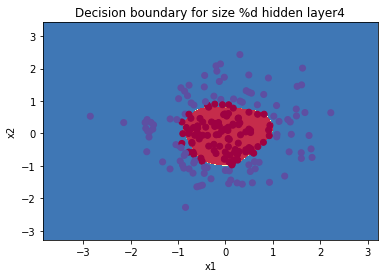

In [129]:
"""
Prediction accuracy using 4 neurons in hidden layer
"""

parameters= nn(x,y,n_h=4,iterations=9000, print_cost=True)
predictions=predict(parameters,x)
#print(predictions.shape,y.shape)
plot_decision_boundary(lambda x: predict(parameters, x.T), x, y[0])
plt.title("Decision boundary for size %d hidden layer"+str(4))

print ('Accuracy of neural network: %d ' % float((np.dot(y,predictions.T) + np.dot(1-y,1-predictions.T))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.578159
Cost after iteration 2000: 0.574990
Cost after iteration 3000: 0.573851
Cost after iteration 4000: 0.573156
Accuracy for 1 hidden units: 65.0 %
Cost after iteration 0: 0.693144
Cost after iteration 1000: 0.124219
Cost after iteration 2000: 0.135940
Cost after iteration 3000: 0.139560
Cost after iteration 4000: 0.117006
Accuracy for 3 hidden units: 92.5 %
Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.120248
Cost after iteration 2000: 0.140041
Cost after iteration 3000: 0.143152
Cost after iteration 4000: 0.205163
Accuracy for 4 hidden units: 89.0 %
Cost after iteration 0: 0.693159
Cost after iteration 1000: 0.138958
Cost after iteration 2000: 0.140315
Cost after iteration 3000: 0.145852
Cost after iteration 4000: 0.105071
Accuracy for 5 hidden units: 97.0 %
Cost after iteration 0: 0.693142
Cost after iteration 1000: 0.119530
Cost after iteration 2000: 0.149927
Cost after iteration 3000: 0.106863
Cost af

C:\Users\gulsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\gulsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy for 20 hidden units: 100.0 %
Cost after iteration 0: 0.693133
Cost after iteration 1000: 0.145475
Cost after iteration 2000: 0.113169
Cost after iteration 3000: 0.089875
Cost after iteration 4000: 0.023050
Accuracy for 30 hidden units: 100.0 %


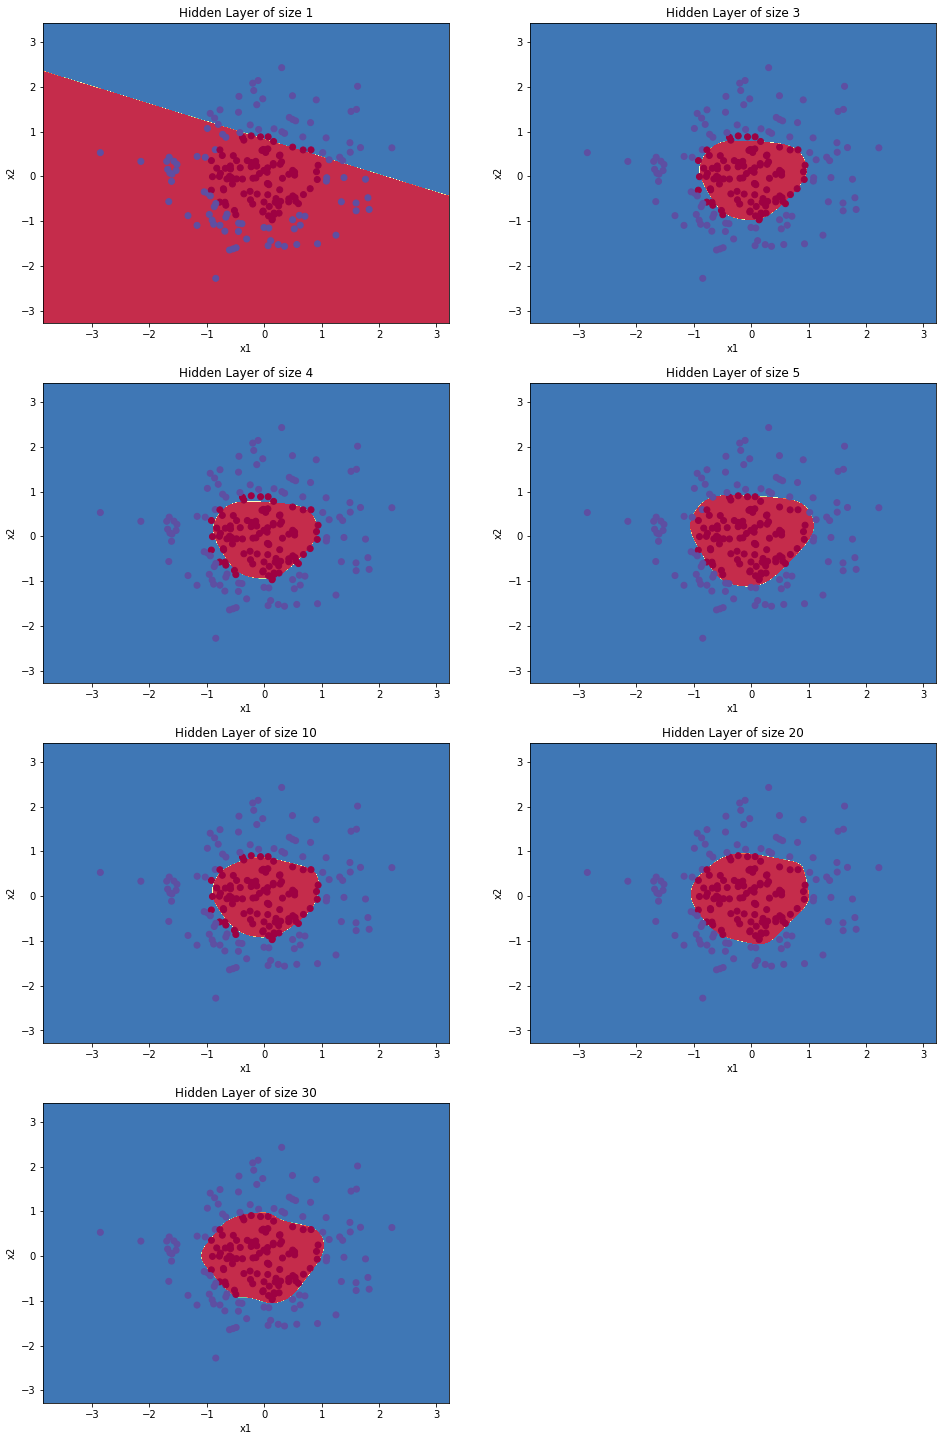

In [134]:
"""
Running neural network with different variations
"""
plt.figure(figsize=(16,32))
hidden_layer_size=[1,3,4,5,10,20,30]
for i,n_h in enumerate(hidden_layer_size):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters=nn(x,y,n_h,iterations=5000,print_cost=True)
    predictions=predict(parameters,x)
    plot_decision_boundary(lambda x: predict(parameters, x.T), x, y[0])
    accuracy=float((np.dot(y,predictions.T)+(np.dot(1-y,1-predictions.T)))/float(y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
    

In [124]:
np.linspace?